# Titanic: Machine Learning from Disaster.
# Predict survival on the Titanic and get familiar with ML basics.

In [1]:
# Import the main libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
# Let's read the 'train' file which countais all the informations that we use to predict the result.

train = pd.read_csv('../input/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# I will adjuste the chart only with the essencial informations to our model.
# We don't need the following columns: 'PassengerId', 'Name', 'Ticket', 'Cabin'

new_train = train.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
new_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


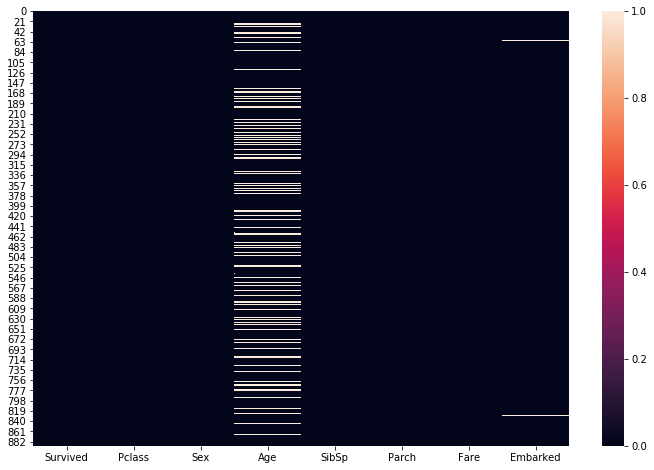

In [4]:
# I will see if there is some 'Nan' informations.

plt.figure(figsize=(12,8))
sns.heatmap(data=pd.isnull(new_train))

# I relized that in 'Age' column there is a lot of missing informations. 
# For this reason is not a good idea delete these inforations.
# On the other hand, in 'Embarked' column there are only two spaces without information.
# So it's a good idea delete these info.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


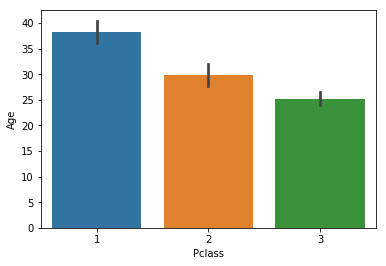

In [5]:
# First, let's complete the missing informations in "Age" column.
# Let's build some graphs to predict how the "Age" can be fill.

sns.barplot(x='Pclass', y='Age', data=new_train)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


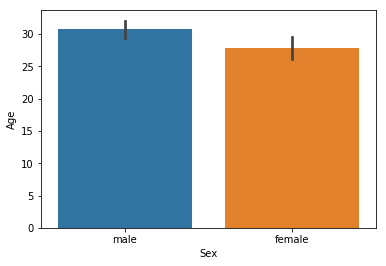

In [6]:
sns.barplot(x='Sex', y='Age', data=new_train)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


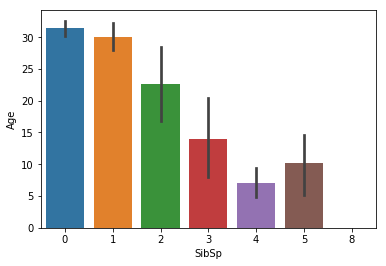

In [7]:
sns.barplot(x='SibSp', y='Age', data=new_train)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


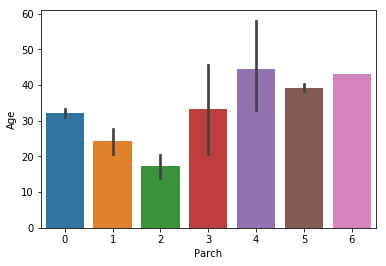

In [8]:
sns.barplot(x='Parch', y='Age', data=new_train)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


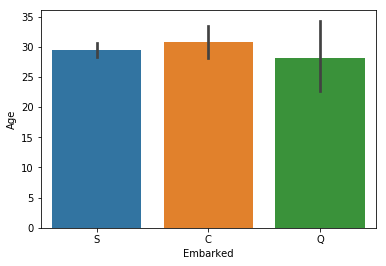

In [9]:
sns.barplot(x='Embarked', y='Age', data=new_train)

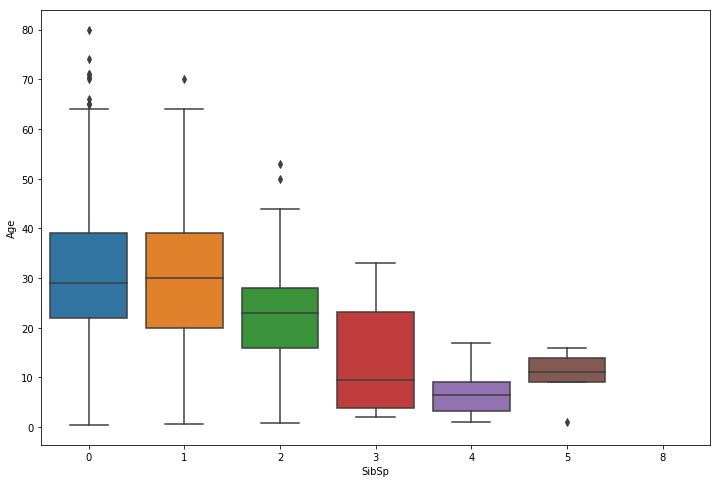

In [10]:
# Looking these charts I can realize that "SibSp" could give me a good informations to fill the missing info in "Age" columns, because I have in this graph a lot of variables.
# Let's see the age means.

plt.figure(figsize=(12,8))
sns.boxplot(x='SibSp', y='Age', data=new_train)

# Now I'm realizing that the mean in many parameters are almost the same.

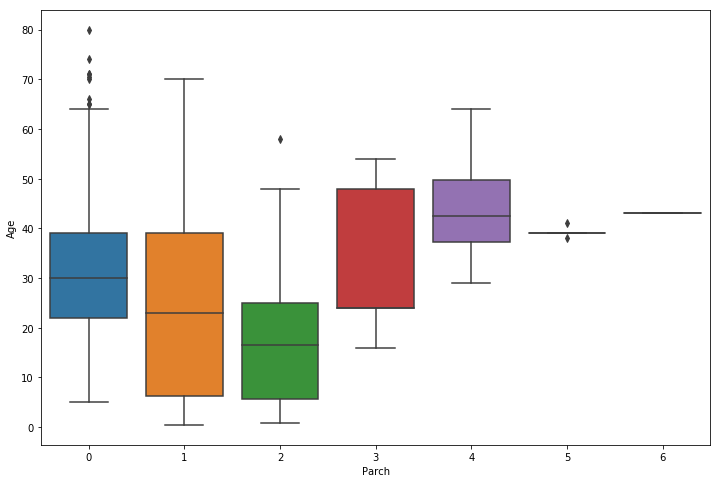

In [11]:
# I will try the second better graph: "Parch"

plt.figure(figsize=(12,8))
sns.boxplot(x='Parch', y='Age', data=new_train)

# I can see here that in four of them has good mean, but others one are very bad.

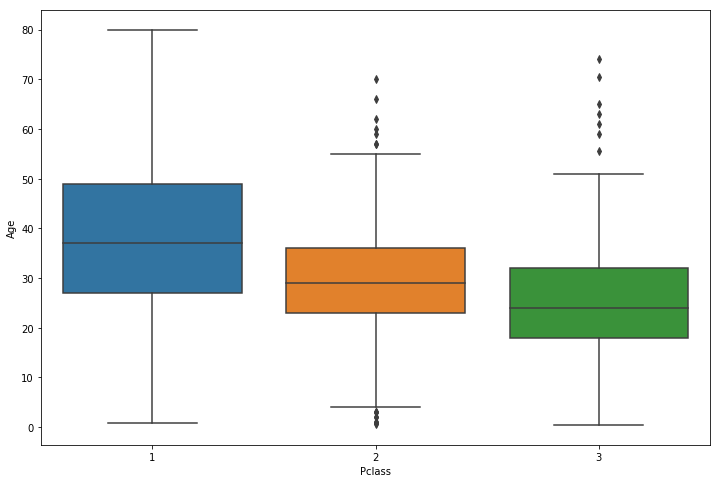

In [12]:
# Let's try now the third better: "Pclass"

plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age', data=new_train)

# Now I can see pretty avarages to put in "Age" columns.

In [13]:
# I will code a function to complete the missing informations in "Age" column with the age mean in this last chart.

def fill_age(col):
    age = col[0]
    pclass = col[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

# Now put this function inside of the data.

new_train['Age'] = new_train[['Age', 'Pclass']].apply(fill_age, axis=1)

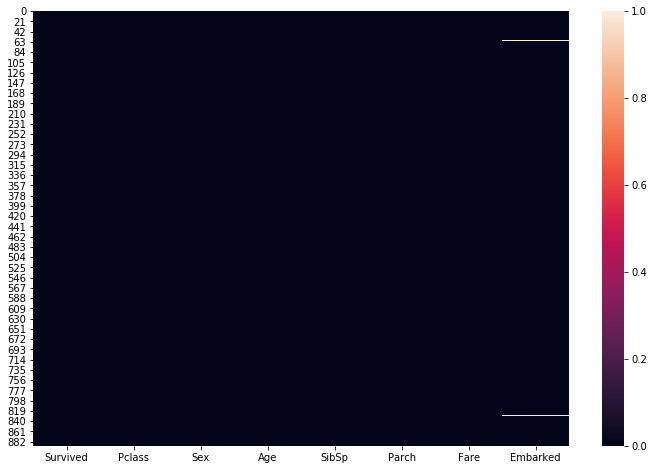

In [14]:
# Let's check if it worked!

plt.figure(figsize=(12,8))
sns.heatmap(data=pd.isnull(new_train))

# Great!

In [15]:
# Now I will delete the two missing informations in "Embarked" column.

new_train.dropna(inplace=True)

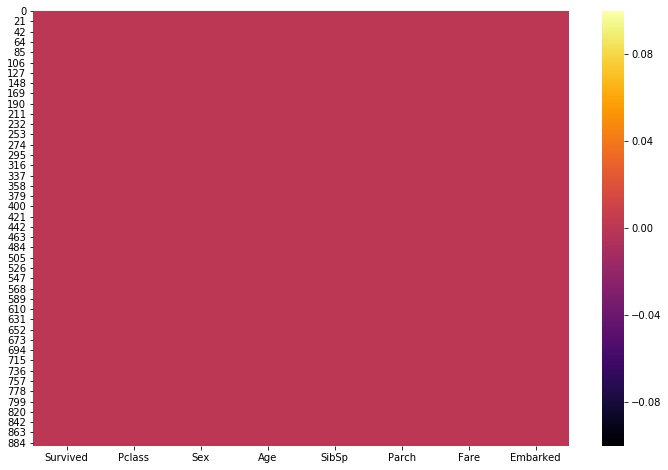

In [16]:
# Let's check again!

plt.figure(figsize=(12,8))
sns.heatmap(data=pd.isnull(new_train), cmap='inferno')

# Good job!

In [17]:
# Now I will change categorical values to number values.
# It will happen to help fitting correctly.

# They will be the "Sex" and "Embarked" columns.
sex = pd.get_dummies(new_train['Sex'], drop_first=True)
embarked = pd.get_dummies(new_train['Embarked'], drop_first=True)

In [18]:
# Now I will delete the old columns and add the new columns.

new_train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

new_train = pd.concat([new_train, sex, embarked], axis=1)

In [19]:
# Let's check!

new_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


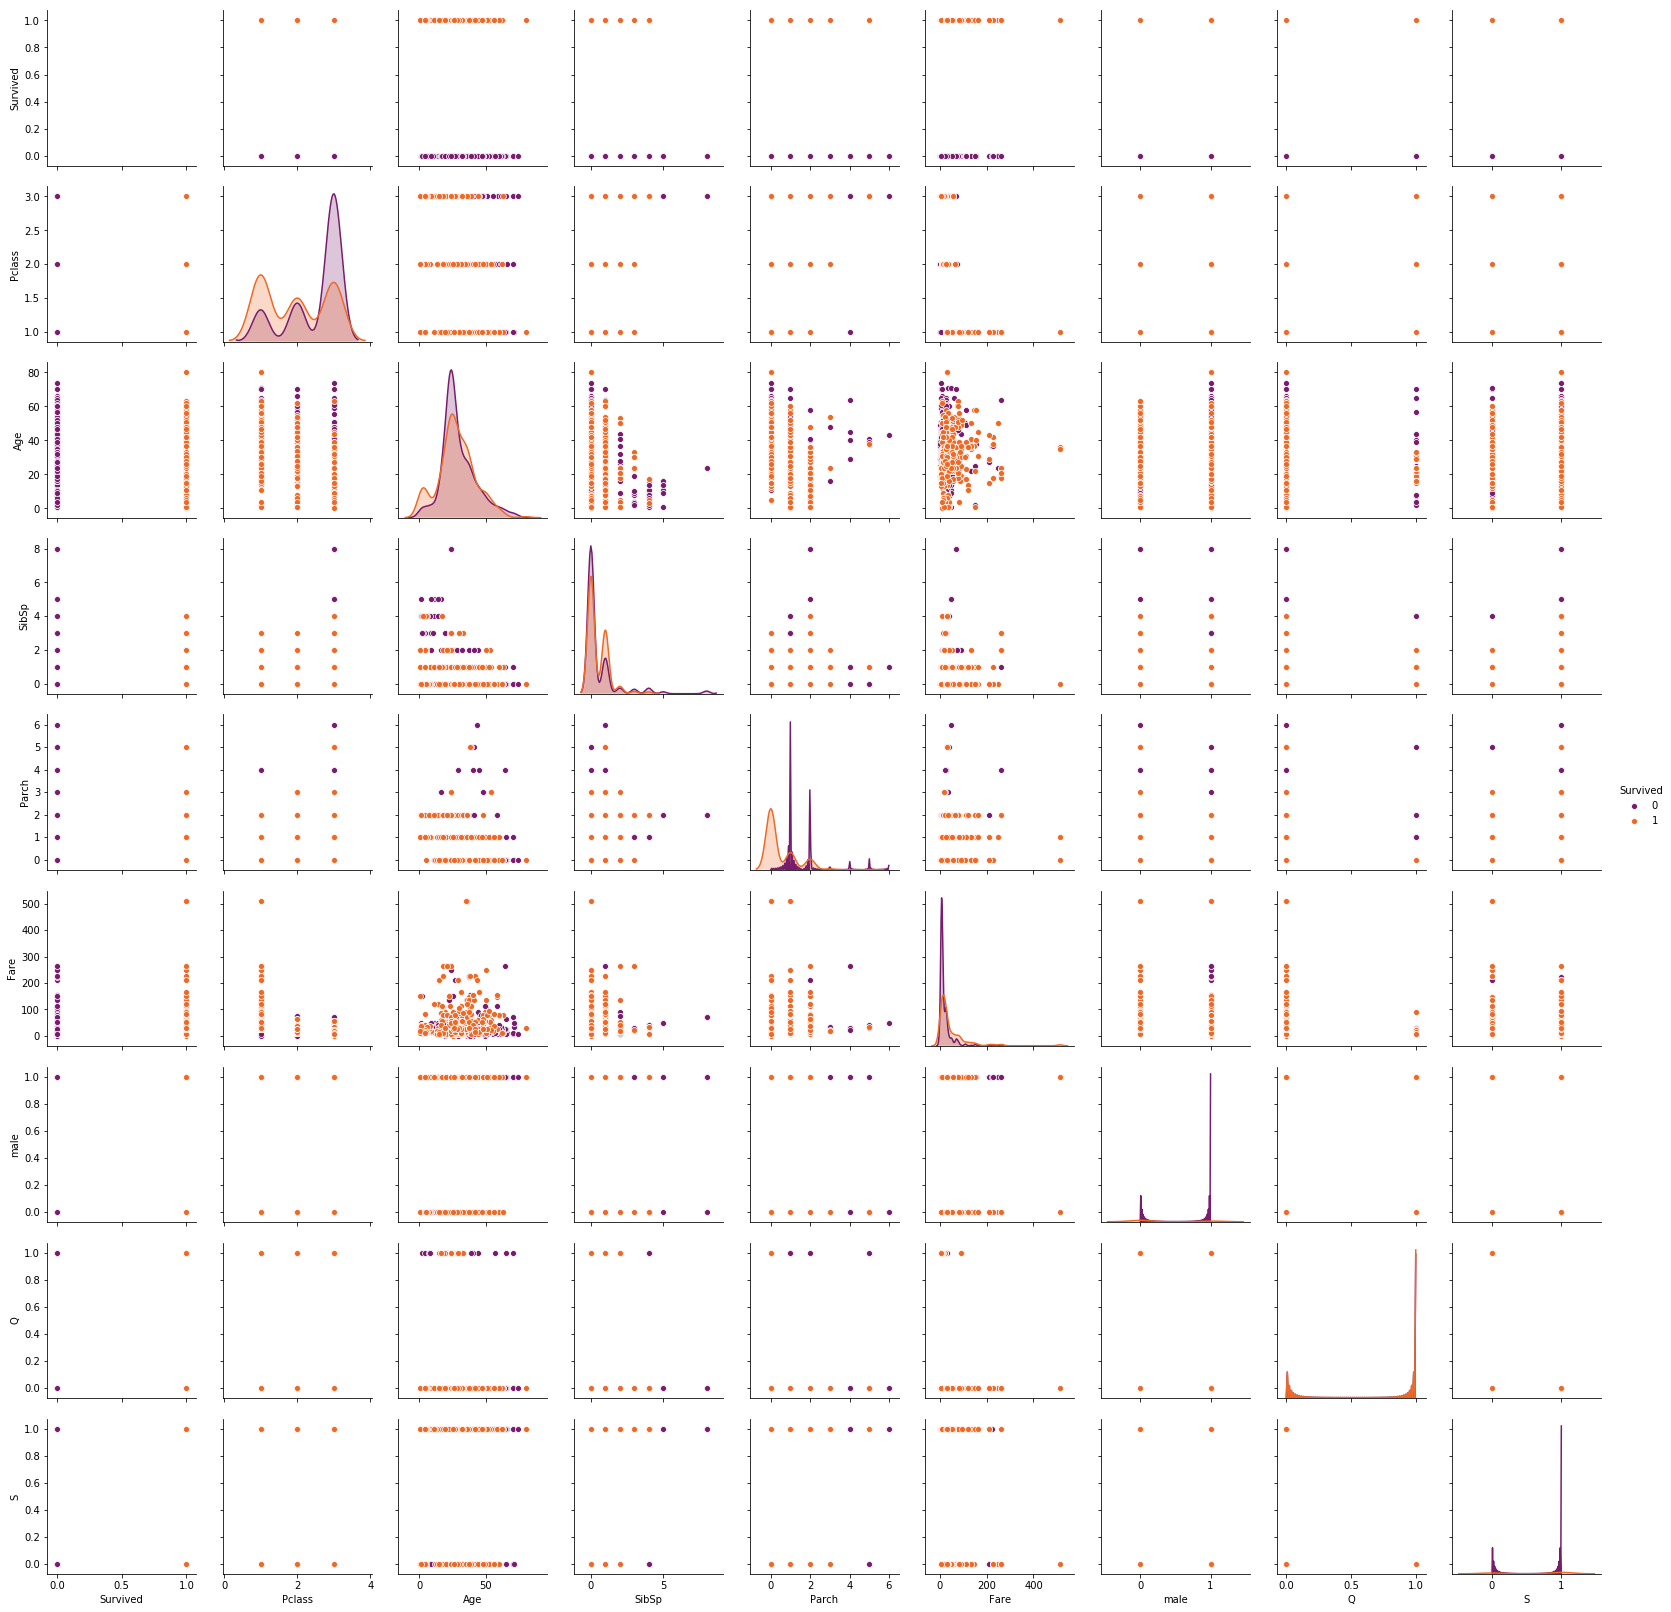

In [20]:
# Now it's time to see how all the informations correlate between themselves.

sns.pairplot(data=new_train, hue='Survived', kind='scatter', palette='inferno')

In [21]:
# The first thing that we can realize with this pairplot is that it's a Classification Algorithm.
# The first Classification Algorithm that I will use will be the Logistic

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [22]:
# Now I will set "X" and "y" within the "train" file.

X_train = new_train.iloc[:,1:].values
y_train = new_train.iloc[:,0].values

In [23]:
# Let's check!

X_train

array([[ 3., 22.,  1., ...,  1.,  0.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 24.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  1.,  1.,  0.]])

In [24]:
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [25]:
# Fitting...

classifier.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

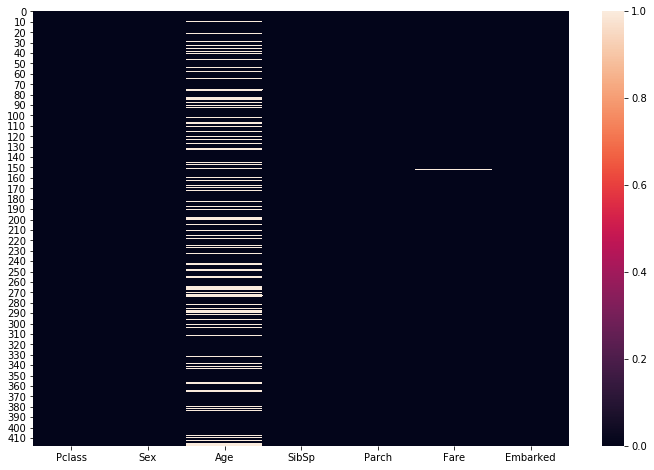

In [26]:
# Now that I already train the data, I will test him.
# First I will read the "test" file and delete the same columns than before.

test = pd.read_csv('../input/test.csv')
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Let's see about the missing info.

plt.figure(figsize=(12,8))
sns.heatmap(test.isnull())

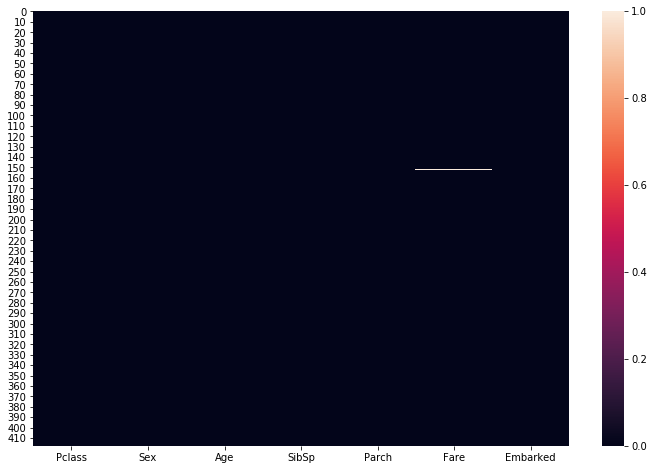

In [27]:
# Again we have to fill the missing info in "Age" column with the function.

test['Age'] = test[['Age', 'Pclass']].apply(fill_age, axis=1)

# Let's Check!

plt.figure(figsize=(12,8))
sns.heatmap(test.isnull())

# Great!

In [28]:
# The numbers of "test" file row and "gender_submission" file are the same. 
# For this reason, We can't delete any row.

# Let's fill the missing info in the "Fare" column.
# First I will see the informations that can help me to predict a fare value.

test[test.Fare.isnull()==True]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [29]:
# Let me see if I can found other passenger who had the same main features and almost the same age.

test[(test.Pclass==3) & (test.Sex=='male') & (test.Age>45) & (test.Embarked=='S')]

# I got it!

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
25,3,male,50.0,1,0,14.5,S
152,3,male,60.5,0,0,NaN,S


In [30]:
# Now I will fill the "Fare" info with the same value from other passenger.

test.Fare.fillna(value=14.5, inplace=True)

# Check!

test.iloc[152]

# Done!

Pclass         3
Sex         male
Age         60.5
SibSp          0
Parch          0
Fare        14.5
Embarked       S
Name: 152, dtype: object

In [31]:
# Now go ahead and tap dummie code.

sex_test = pd.get_dummies(test['Sex'], drop_first=True)
embarked_test = pd.get_dummies(test['Embarked'], drop_first=True)

test.drop(['Sex', 'Embarked'], axis=1, inplace=True)
new_test = pd.concat([test, sex_test, embarked_test], axis=1)

X_test = new_test.iloc[:, 0:8].values

# Let's check!

X_test


array([[ 3. , 34.5,  0. , ...,  1. ,  1. ,  0. ],
       [ 3. , 47. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 2. , 62. ,  0. , ...,  1. ,  1. ,  0. ],
       ...,
       [ 3. , 38.5,  0. , ...,  1. ,  0. ,  1. ],
       [ 3. , 24. ,  0. , ...,  1. ,  0. ,  1. ],
       [ 3. , 24. ,  1. , ...,  1. ,  0. ,  0. ]])

In [32]:
# It's time to predict.

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
# Let's compare the results!

compare = pd.read_csv('../input/gender_submission.csv')
y_test = compare.iloc[:,1].values
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       266
           1       0.94      0.95      0.94       152

   micro avg       0.96      0.96      0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



[[257   9]
 [  8 144]]


# We had a lot of work, but it was worth it!!!

# See you in the next Project!!! 🚢🎉😎